In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [106]:
shenzhen = pd.read_csv("Shenzhen_useful.csv")
shenzhen['acid_feed'] = shenzhen['1_acidification_hydrolysis_tank_feed_'] \
                                             + shenzhen['2_acidification_hydrolysis_tank_feed_']
shenzhen['acid_discharge']  = shenzhen['1_acidification_hydrolysis_tank_discharge_']\
                                             + shenzhen['2_acidification_hydrolysis_tank_discharge_']
shenzhen['anaerobic_feed'] = shenzhen['1_Anaerobic_tank_slurry_feed_'] \
                                             + shenzhen['2_Anaerobic_tank_slurry_feed_']
shenzhen['anaerobic_cumuprod'] = shenzhen['1_Anaerobic_tank_biogas_cumulative_production_'] \
                                             + shenzhen['2_anaerobic_tank_biogas_cumulative_production_']
shenzhen['anaerobic_dailyoutput'] = shenzhen['1_anaerobic_tank_biogas_daily_output_'] \
                                             + shenzhen['2_anaerobic_tank_biogas_daily_output_']
shenzhen = shenzhen.drop(['1_acidification_hydrolysis_tank_feed_','2_acidification_hydrolysis_tank_feed_',\
               '1_acidification_hydrolysis_tank_discharge_','2_acidification_hydrolysis_tank_discharge_',\
               '1_Anaerobic_tank_slurry_feed_','2_Anaerobic_tank_slurry_feed_',\
               '1_Anaerobic_tank_biogas_cumulative_production_','2_anaerobic_tank_biogas_cumulative_production_',\
               '1_anaerobic_tank_biogas_daily_output_','2_anaerobic_tank_biogas_daily_output_'],axis = 1)
print(shenzhen.columns)
shenzhen.head(20)

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Kitchen_waste_',
       'Fruit_and_vegetable_waste_', 'Bread_Paste_', 'Waste_oil_',
       'Total_Waste_', 'Diesel_waste_water_', 'Flour_and_waste_oil_',
       'Kitchen_waste_paste_', 'acid_feed', 'acid_discharge', 'anaerobic_feed',
       'anaerobic_cumuprod', 'anaerobic_dailyoutput'],
      dtype='object')


,Unnamed: 0,Year,Month,Day,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,anaerobic_feed,anaerobic_cumuprod,anaerobic_dailyoutput
0,0,2015,December,1,92.03,0.00,7.95,13.54,99.98,54.0,17.0,167,0.0,0,130,340453,7919
1,1,2015,December,2,78.43,0.00,13.30,16.10,91.73,36.0,8.0,100,0.0,0,170,343154,2701
2,2,2015,December,3,81.84,0.00,8.35,6.60,90.19,22.0,34.0,120,0.0,0,150,353361,10207
3,3,2015,December,4,81.05,0.00,9.10,17.48,90.15,22.0,20.0,92,0.0,0,160,363943,10582
4,4,2015,December,5,36.86,0.00,9.40,12.47,46.26,44.0,35.0,122,0.0,0,160,372971,9028
5,5,2015,December,6,21.58,0.00,16.20,11.85,37.78,22.0,21.0,0,0.0,0,160,385089,9118
6,6,2015,December,7,89.98,0.00,9.10,12.14,99.08,30.0,48.0,96,0.0,0,160,392165,10076
7,7,2015,December,8,80.46,9.80,16.90,13.92,107.16,29.0,31.0,148,0.0,0,170,402285,9936
8,8,2015,December,9,77.20,10.40,5.60,10.69,93.20,22.0,12.0,114,0.0,0,160,412201,9916
9,9,2015,December,10,78.37,9.34,8.30,9.79,96.01,25.0,40.0,140,0.0,0,200,419348,7147


In [107]:
shenzhen.acid_feed = shenzhen.acid_feed.shift(-15)
shenzhen.acid_discharge = shenzhen.acid_discharge.shift(-15)
shenzhen.anaerobic_feed = shenzhen.anaerobic_feed.shift(-15)
shenzhen.anaerobic_cumuprod = shenzhen.anaerobic_cumuprod.shift(-15)
shenzhen.anaerobic_dailyoutput = shenzhen.anaerobic_dailyoutput.shift(-15)

In [108]:
shenzhen = shenzhen.drop(['Year','Month','Day'], axis=1)

In [109]:
shenzhen = shenzhen.drop(['Unnamed: 0'], axis=1)

In [110]:
shenzhen = shenzhen[:-15]

In [111]:
shenzhen.tail()

,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,anaerobic_feed,anaerobic_cumuprod,anaerobic_dailyoutput
436,150.03,25.45,0.0,6.49,175.48,44.0,0.0,151,0.0,200.0,200.0,3091363.0,7526.0
437,144.28,49.36,0.0,10.04,193.64,44.0,0.0,145,0.0,210.0,210.0,3098699.0,7336.0
438,98.96,32.86,0.0,9.79,131.82,0.0,0.0,101,0.0,230.0,230.0,3105678.0,6979.0
439,86.92,32.11,0.0,11.71,119.03,44.0,0.0,89,0.0,220.0,220.0,3112064.0,6626.0
440,158.93,33.02,0.0,9.10,191.95,0.0,0.0,160,0.0,230.0,230.0,3119057.0,6993.0


In [112]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(shenzhen)
shenzhen_normalized = pd.DataFrame(np_scaled)
shenzhen_normalized.columns = ['Kitchen_waste_',\
       'Fruit_and_vegetable_waste_', 'Bread_Paste_', 'Waste_oil_',\
       'Total_Waste_', 'Diesel_waste_water_', 'Flour_and_waste_oil_',\
       'Kitchen_waste_paste_', 'acid_feed', 'acid_discharge', 'anaerobic_feed',\
       'anaerobic_cumuprod', 'anaerobic_dailyoutput']

In [113]:
shenzhennor_train, shenzhennor_test = train_test_split(shenzhen_normalized, test_size=0.15)
Xnor_train = shenzhennor_train[['Kitchen_waste_',\
       'Fruit_and_vegetable_waste_', 'Bread_Paste_', 'Waste_oil_',\
       'Total_Waste_', 'Diesel_waste_water_', 'Flour_and_waste_oil_',\
       'Kitchen_waste_paste_']]
ynor_train = shenzhennor_train['anaerobic_dailyoutput']
Xnor_test = shenzhennor_test[['Kitchen_waste_',\
       'Fruit_and_vegetable_waste_', 'Bread_Paste_', 'Waste_oil_',\
       'Total_Waste_', 'Diesel_waste_water_', 'Flour_and_waste_oil_',\
       'Kitchen_waste_paste_']]
ynor_test = shenzhennor_test['anaerobic_dailyoutput']
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(Xnor_train, ynor_train)
y_pred_test = knn.predict(Xnor_test)
print('Accuracy of kNN on train set: {:.2f}'.format(knn.score(Xnor_train, ynor_train)))
print('Accuracy of kNN on test set: {:.2f}'.format(knn.score(Xnor_test, ynor_test)))

Accuracy of kNN on train set: 0.45
Accuracy of kNN on test set: 0.13


In [114]:
shenzhen['anaerobic_dailyoutput']=pd.cut(shenzhen['anaerobic_dailyoutput'],bins = 3)

In [115]:
shenzhen.anaerobic_dailyoutput = pd.factorize(shenzhen.anaerobic_dailyoutput)[0]

In [116]:
# split train and test data for classificaiton models
shenzhen_traincla, shenzhen_testcla = train_test_split(shenzhen, test_size=0.15)
print('classification train data len:',len(shenzhen_traincla))
print('classification test data len:',len(shenzhen_testcla))

classification train data len: 374
classification test data len: 67


In [117]:
# After cut to 3 bins, reset the train and test data
X_traincla = shenzhen_traincla[['Kitchen_waste_','Fruit_and_vegetable_waste_', \
                                'Bread_Paste_', 'Waste_oil_','Total_Waste_', \
                                'Diesel_waste_water_', 'Flour_and_waste_oil_','Kitchen_waste_paste_']]
y_traincla = shenzhen_traincla.anaerobic_dailyoutput
X_testcla = shenzhen_testcla[['Kitchen_waste_','Fruit_and_vegetable_waste_', \
                                'Bread_Paste_', 'Waste_oil_','Total_Waste_', \
                                'Diesel_waste_water_', 'Flour_and_waste_oil_','Kitchen_waste_paste_']]
y_testcla = shenzhen_testcla.anaerobic_dailyoutput

In [118]:
shenzhen.head()

,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,anaerobic_feed,anaerobic_cumuprod,anaerobic_dailyoutput
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,200.0,464356.0,0
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,155.0,472980.0,0
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,160.0,481426.0,0
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,150.0,490210.0,0
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,150.0,497959.0,1


In [119]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_traincla, y_traincla)
y_pred_test = xgb.predict(X_testcla)
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb.score(X_testcla, y_testcla)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

Accuracy of XGboost on train set: 0.90
Accuracy of XGboost on test set: 0.57
[[ 1 10  0]
 [ 2 34  2]
 [ 0 15  3]]


/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
 

Best: -0.930411 using {'n_estimators': 30}
-0.962077 (0.039114) with: {'n_estimators': 10}
-0.930411 (0.071044) with: {'n_estimators': 30}
-0.941387 (0.086455) with: {'n_estimators': 50}
-0.955649 (0.094806) with: {'n_estimators': 70}
-0.974177 (0.106001) with: {'n_estimators': 90}
-0.997351 (0.120132) with: {'n_estimators': 110}
-1.021295 (0.134326) with: {'n_estimators': 130}
-1.040934 (0.147800) with: {'n_estimators': 150}
-1.062774 (0.155549) with: {'n_estimators': 170}
-1.084483 (0.161526) with: {'n_estimators': 190}


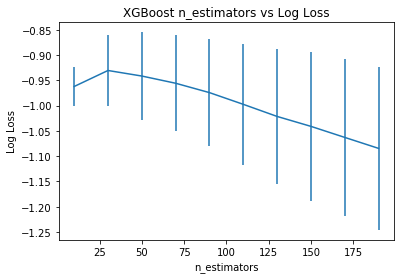

In [120]:
# XGBoost Tune n_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# grid search
model = XGBClassifier()
n_estimators = range(10, 200, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

range(1, 22, 2)
Fitting 10 folds for each of 11 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    9.9s finished


Best: -0.930699 using {'max_depth': 1}
-0.930699 (0.052692) with: {'max_depth': 1}
-0.988730 (0.111992) with: {'max_depth': 3}
-1.063197 (0.150714) with: {'max_depth': 5}
-1.107635 (0.152749) with: {'max_depth': 7}
-1.154305 (0.148353) with: {'max_depth': 9}
-1.167496 (0.152990) with: {'max_depth': 11}
-1.150952 (0.167033) with: {'max_depth': 13}
-1.165836 (0.169191) with: {'max_depth': 15}
-1.164534 (0.164771) with: {'max_depth': 17}
-1.156491 (0.156432) with: {'max_depth': 19}
-1.157272 (0.158489) with: {'max_depth': 21}


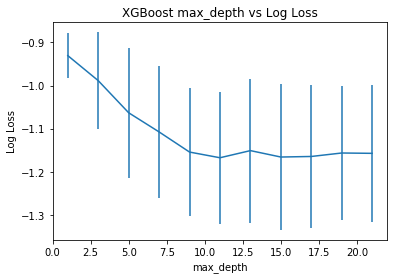

In [121]:
# XGBoost Tune max_depth
max_depth = range(1, 22, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [122]:
# apply models with best n_estimator = 30 and max_depth = 1
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=70,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_traincla, y_traincla)
y_pred_test = xgb1.predict(X_testcla)
# calculate accuracy
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb1.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb1.score(X_testcla, y_testcla)))

Accuracy of XGboost on train set: 0.81
Accuracy of XGboost on test set: 0.58


In [123]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

[[ 0 10  1]
 [ 0 35  3]
 [ 0 14  4]]


# Treat with 1/x

In [124]:
for col in shenzhen.columns[:10]:
    shenzhen['1/'+col] = 1/(shenzhen[col])
shenzhen.columns

Index(['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',
       'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',
       'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',
       'acid_discharge', 'anaerobic_feed', 'anaerobic_cumuprod',
       'anaerobic_dailyoutput', '1/Kitchen_waste_',
       '1/Fruit_and_vegetable_waste_', '1/Bread_Paste_', '1/Waste_oil_',
       '1/Total_Waste_', '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',
       '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge'],
      dtype='object')

In [125]:
shenzhen.replace(float('inf'), 0, inplace = True);
shenzhen_train, shenzhen_test = train_test_split(shenzhen, test_size=0.2)
print('train data len:',len(shenzhen_train))
print('test data len:',len(shenzhen_test))
shenzhen.head()

train data len: 352
test data len: 89


,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,...,1/Kitchen_waste_,1/Fruit_and_vegetable_waste_,1/Bread_Paste_,1/Waste_oil_,1/Total_Waste_,1/Diesel_waste_water_,1/Flour_and_waste_oil_,1/Kitchen_waste_paste_,1/acid_feed,1/acid_discharge
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,...,0.010866,0.0,0.125786,0.073855,0.010002,0.018519,0.058824,0.005988,0.007407,0.005000
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,...,0.012750,0.0,0.075188,0.062112,0.010902,0.027778,0.125000,0.010000,0.010989,0.006452
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,...,0.012219,0.0,0.119760,0.151515,0.011088,0.045455,0.029412,0.008333,0.020000,0.006250
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,...,0.012338,0.0,0.109890,0.057208,0.011093,0.045455,0.050000,0.010870,0.010526,0.006667
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,...,0.027130,0.0,0.106383,0.080192,0.021617,0.022727,0.028571,0.008197,0.111111,0.006667


In [126]:
shenzhen.columns

Index(['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',
       'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',
       'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',
       'acid_discharge', 'anaerobic_feed', 'anaerobic_cumuprod',
       'anaerobic_dailyoutput', '1/Kitchen_waste_',
       '1/Fruit_and_vegetable_waste_', '1/Bread_Paste_', '1/Waste_oil_',
       '1/Total_Waste_', '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',
       '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge'],
      dtype='object')

In [127]:
# set the train and test data
X_traincla = shenzhen_train[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                                'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                                'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                                'acid_discharge','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                                '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                                '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                                '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge']]
y_traincla = shenzhen_train.anaerobic_dailyoutput
X_testcla = shenzhen_test[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                                'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                                'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                                'acid_discharge','1/Kitchen_waste_','1/Fruit_and_vegetable_waste_',\
                                '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                                '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                                '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge']]
y_testcla = shenzhen_test.anaerobic_dailyoutput

In [128]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_traincla, y_traincla)
y_pred_test = xgb.predict(X_testcla)
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb.score(X_testcla, y_testcla)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

Accuracy of XGboost on train set: 0.95
Accuracy of XGboost on test set: 0.48
[[ 0 10  1]
 [ 4 37  6]
 [ 0 25  6]]


/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
 

Best: -0.871774 using {'n_estimators': 50}
-0.926498 (0.026952) with: {'n_estimators': 10}
-0.876269 (0.042871) with: {'n_estimators': 30}
-0.871774 (0.062260) with: {'n_estimators': 50}
-0.878058 (0.072276) with: {'n_estimators': 70}
-0.892685 (0.080854) with: {'n_estimators': 90}
-0.916173 (0.093341) with: {'n_estimators': 110}
-0.935418 (0.103957) with: {'n_estimators': 130}
-0.952945 (0.111874) with: {'n_estimators': 150}
-0.966266 (0.120995) with: {'n_estimators': 170}
-0.975986 (0.127892) with: {'n_estimators': 190}


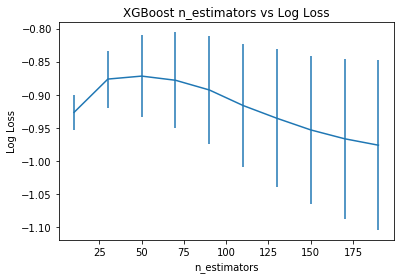

In [129]:
# XGBoost Tune n_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# grid search
model = XGBClassifier()
n_estimators = range(10, 200, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

range(3, 10)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    9.7s finished


Best: -0.907894 using {'max_depth': 3}
-0.907894 (0.089604) with: {'max_depth': 3}
-0.946426 (0.108759) with: {'max_depth': 4}
-1.024094 (0.117454) with: {'max_depth': 5}
-1.052880 (0.154521) with: {'max_depth': 6}
-1.105681 (0.155913) with: {'max_depth': 7}
-1.116874 (0.166904) with: {'max_depth': 8}
-1.125016 (0.172739) with: {'max_depth': 9}


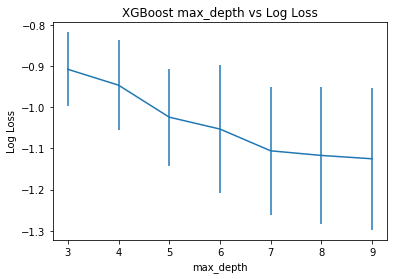

In [130]:
# XGBoost Tune max_depth
max_depth = range(3, 10, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

# Treat with x**2

In [131]:
for col in shenzhen.columns[:10]:
    shenzhen[col+"**2"] = (shenzhen[col])**2
shenzhen.head()

,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,...,Kitchen_waste_**2,Fruit_and_vegetable_waste_**2,Bread_Paste_**2,Waste_oil_**2,Total_Waste_**2,Diesel_waste_water_**2,Flour_and_waste_oil_**2,Kitchen_waste_paste_**2,acid_feed**2,acid_discharge**2
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,...,8469.5209,0.0,63.2025,183.3316,9996.0004,2916.0,289.0,27889,18225.0,40000.0
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,...,6151.2649,0.0,176.8900,259.2100,8414.3929,1296.0,64.0,10000,8281.0,24025.0
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,...,6697.7856,0.0,69.7225,43.5600,8134.2361,484.0,1156.0,14400,2500.0,25600.0
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,...,6569.1025,0.0,82.8100,305.5504,8127.0225,484.0,400.0,8464,9025.0,22500.0
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,...,1358.6596,0.0,88.3600,155.5009,2139.9876,1936.0,1225.0,14884,81.0,22500.0


In [132]:
shenzhen_train, shenzhen_test = train_test_split(shenzhen, test_size=0.15)
print('train data len:',len(shenzhen_train))
print('test data len:',len(shenzhen_test))

train data len: 374
test data len: 67


In [133]:
shenzhen.columns

Index(['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',
       'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',
       'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',
       'acid_discharge', 'anaerobic_feed', 'anaerobic_cumuprod',
       'anaerobic_dailyoutput', '1/Kitchen_waste_',
       '1/Fruit_and_vegetable_waste_', '1/Bread_Paste_', '1/Waste_oil_',
       '1/Total_Waste_', '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',
       '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',
       'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', 'Bread_Paste_**2',
       'Waste_oil_**2', 'Total_Waste_**2', 'Diesel_waste_water_**2',
       'Flour_and_waste_oil_**2', 'Kitchen_waste_paste_**2', 'acid_feed**2',
       'acid_discharge**2'],
      dtype='object')

In [134]:
# set the train and test data
X_traincla = shenzhen_train[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                             'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                             'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                             'acid_discharge','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                             '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                             '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                             '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',\
                             'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', \
                             'Bread_Paste_**2','Waste_oil_**2', 'Total_Waste_**2', \
                             'Diesel_waste_water_**2','Flour_and_waste_oil_**2', \
                             'Kitchen_waste_paste_**2', 'acid_feed**2','acid_discharge**2']]
y_traincla = shenzhen_train.anaerobic_dailyoutput
X_testcla = shenzhen_test[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                             'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                             'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                             'acid_discharge','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                             '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                             '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                             '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',\
                             'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', \
                             'Bread_Paste_**2','Waste_oil_**2', 'Total_Waste_**2', \
                             'Diesel_waste_water_**2','Flour_and_waste_oil_**2', \
                             'Kitchen_waste_paste_**2', 'acid_feed**2','acid_discharge**2']]
y_testcla = shenzhen_test.anaerobic_dailyoutput

In [135]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_traincla, y_traincla)
y_pred_test = xgb.predict(X_testcla)
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb.score(X_testcla, y_testcla)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

Accuracy of XGboost on train set: 0.93
Accuracy of XGboost on test set: 0.51
[[ 0 11  0]
 [ 2 30  4]
 [ 0 16  4]]


/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
 

Best: -0.896079 using {'n_estimators': 50}
-0.934533 (0.040922) with: {'n_estimators': 10}
-0.900438 (0.076837) with: {'n_estimators': 30}
-0.896079 (0.102867) with: {'n_estimators': 50}
-0.904047 (0.116603) with: {'n_estimators': 70}
-0.916269 (0.127498) with: {'n_estimators': 90}
-0.931139 (0.138830) with: {'n_estimators': 110}
-0.942167 (0.150637) with: {'n_estimators': 130}
-0.959777 (0.157800) with: {'n_estimators': 150}
-0.973149 (0.164307) with: {'n_estimators': 170}
-0.991624 (0.171829) with: {'n_estimators': 190}


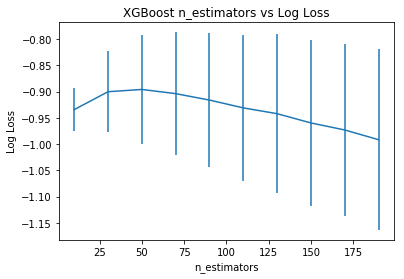

In [136]:
# XGBoost Tune n_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# grid search
model = XGBClassifier()
n_estimators = range(10, 200, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

range(3, 10)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   15.3s finished


Best: -0.923003 using {'max_depth': 3}
-0.923003 (0.134660) with: {'max_depth': 3}
-0.926069 (0.151840) with: {'max_depth': 4}
-1.000075 (0.198740) with: {'max_depth': 5}
-1.043384 (0.222309) with: {'max_depth': 6}
-1.055024 (0.232520) with: {'max_depth': 7}
-1.103330 (0.213835) with: {'max_depth': 8}
-1.090494 (0.231078) with: {'max_depth': 9}


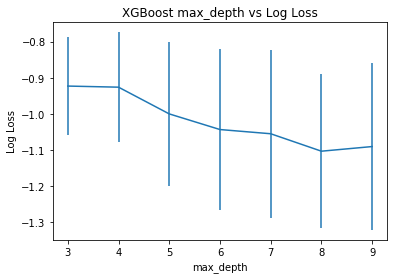

In [137]:
# XGBoost Tune max_depth
max_depth = range(3, 10, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [138]:
# apply models with best n_estimator = 30 and max_depth = 1
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=70,
 max_depth=3,
 min_child_weight=6,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(X_traincla, y_traincla)
y_pred_test = xgb1.predict(X_testcla)
# calculate accuracy
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb1.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb1.score(X_testcla, y_testcla)))

Accuracy of XGboost on train set: 0.85
Accuracy of XGboost on test set: 0.51


# Treat with LogX

In [139]:
for col in shenzhen.columns[:10]:
    shenzhen[col+"log"] = np.log(shenzhen[col])
shenzhen.head()

/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,...,Kitchen_waste_log,Fruit_and_vegetable_waste_log,Bread_Paste_log,Waste_oil_log,Total_Waste_log,Diesel_waste_water_log,Flour_and_waste_oil_log,Kitchen_waste_paste_log,acid_feedlog,acid_dischargelog
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,...,4.522115,-inf,2.073172,2.605648,4.604970,3.988984,2.833213,5.117994,4.905275,5.298317
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,...,4.362207,-inf,2.587764,2.778819,4.518849,3.583519,2.079442,4.605170,4.510860,5.043425
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,...,4.404766,-inf,2.122262,1.887070,4.501919,3.091042,3.526361,4.787492,3.912023,5.075174
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,...,4.395066,-inf,2.208274,2.861057,4.501475,3.091042,2.995732,4.521789,4.553877,5.010635
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,...,3.607127,-inf,2.240710,2.523326,3.834278,3.784190,3.555348,4.804021,2.197225,5.010635


In [140]:
shenzhen_train, shenzhen_test = train_test_split(shenzhen, test_size=0.15)
print('train data len:',len(shenzhen_train))
print('test data len:',len(shenzhen_test))

train data len: 374
test data len: 67


In [141]:
shenzhen.columns

Index(['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',
       'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',
       'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',
       'acid_discharge', 'anaerobic_feed', 'anaerobic_cumuprod',
       'anaerobic_dailyoutput', '1/Kitchen_waste_',
       '1/Fruit_and_vegetable_waste_', '1/Bread_Paste_', '1/Waste_oil_',
       '1/Total_Waste_', '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',
       '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',
       'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', 'Bread_Paste_**2',
       'Waste_oil_**2', 'Total_Waste_**2', 'Diesel_waste_water_**2',
       'Flour_and_waste_oil_**2', 'Kitchen_waste_paste_**2', 'acid_feed**2',
       'acid_discharge**2', 'Kitchen_waste_log',
       'Fruit_and_vegetable_waste_log', 'Bread_Paste_log', 'Waste_oil_log',
       'Total_Waste_log', 'Diesel_waste_water_log', 'Flour_and_waste_oil_log',
       'Kitchen_waste_paste_log', 'ac

In [142]:
# set the train and test data
X_traincla = shenzhen_train[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                             'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                             'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                             'acid_discharge','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                             '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                             '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                             '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',\
                             'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', \
                             'Bread_Paste_**2','Waste_oil_**2', 'Total_Waste_**2', \
                             'Diesel_waste_water_**2','Flour_and_waste_oil_**2', \
                             'Kitchen_waste_paste_**2', 'acid_feed**2','acid_discharge**2',\
                             'Kitchen_waste_log','Fruit_and_vegetable_waste_log', \
                             'Bread_Paste_log', 'Waste_oil_log','Total_Waste_log', \
                             'Diesel_waste_water_log', 'Flour_and_waste_oil_log',\
                             'Kitchen_waste_paste_log', 'acid_feedlog', 'acid_dischargelog']]
y_traincla = shenzhen_train.anaerobic_dailyoutput
X_testcla = shenzhen_test[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                             'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                             'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                             'acid_discharge','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                             '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                             '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                             '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',\
                             'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', \
                             'Bread_Paste_**2','Waste_oil_**2', 'Total_Waste_**2', \
                             'Diesel_waste_water_**2','Flour_and_waste_oil_**2', \
                             'Kitchen_waste_paste_**2', 'acid_feed**2','acid_discharge**2',\
                             'Kitchen_waste_log','Fruit_and_vegetable_waste_log', \
                             'Bread_Paste_log', 'Waste_oil_log','Total_Waste_log', \
                             'Diesel_waste_water_log', 'Flour_and_waste_oil_log',\
                             'Kitchen_waste_paste_log', 'acid_feedlog', 'acid_dischargelog']]
y_testcla = shenzhen_test.anaerobic_dailyoutput

In [143]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_traincla, y_traincla)
y_pred_test = xgb.predict(X_testcla)
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb.score(X_testcla, y_testcla)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

Accuracy of XGboost on train set: 0.92
Accuracy of XGboost on test set: 0.57
[[ 1  9  0]
 [ 4 28  4]
 [ 0 12  9]]


# Conclusion: the best model is treated with 1/, x**2 and logx

# Treat with Time-series value

In [144]:
shenzhen = pd.read_csv("Shenzhen_useful.csv")
shenzhen['acid_feed'] = shenzhen['1_acidification_hydrolysis_tank_feed_'] \
                                             + shenzhen['2_acidification_hydrolysis_tank_feed_']
shenzhen['acid_discharge']  = shenzhen['1_acidification_hydrolysis_tank_discharge_']\
                                             + shenzhen['2_acidification_hydrolysis_tank_discharge_']
shenzhen['anaerobic_feed'] = shenzhen['1_Anaerobic_tank_slurry_feed_'] \
                                             + shenzhen['2_Anaerobic_tank_slurry_feed_']
shenzhen['anaerobic_cumuprod'] = shenzhen['1_Anaerobic_tank_biogas_cumulative_production_'] \
                                             + shenzhen['2_anaerobic_tank_biogas_cumulative_production_']
shenzhen['anaerobic_dailyoutput'] = shenzhen['1_anaerobic_tank_biogas_daily_output_'] \
                                             + shenzhen['2_anaerobic_tank_biogas_daily_output_']
shenzhen = shenzhen.drop(['1_acidification_hydrolysis_tank_feed_','2_acidification_hydrolysis_tank_feed_',\
               '1_acidification_hydrolysis_tank_discharge_','2_acidification_hydrolysis_tank_discharge_',\
               '1_Anaerobic_tank_slurry_feed_','2_Anaerobic_tank_slurry_feed_',\
               '1_Anaerobic_tank_biogas_cumulative_production_','2_anaerobic_tank_biogas_cumulative_production_',\
               '1_anaerobic_tank_biogas_daily_output_','2_anaerobic_tank_biogas_daily_output_'],axis = 1)
print(shenzhen.columns)
shenzhen.head(20)
shenzhen.acid_feed = shenzhen.acid_feed.shift(-15)
shenzhen.acid_discharge = shenzhen.acid_discharge.shift(-15)
shenzhen.anaerobic_feed = shenzhen.anaerobic_feed.shift(-15)
shenzhen.anaerobic_cumuprod = shenzhen.anaerobic_cumuprod.shift(-15)
shenzhen.anaerobic_dailyoutput = shenzhen.anaerobic_dailyoutput.shift(-15)
shenzhen = shenzhen.drop(['Year','Month','Day'], axis=1)
shenzhen = shenzhen.drop(['Unnamed: 0'], axis=1)
shenzhen = shenzhen[:-15]
shenzhen.head()

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Kitchen_waste_',
       'Fruit_and_vegetable_waste_', 'Bread_Paste_', 'Waste_oil_',
       'Total_Waste_', 'Diesel_waste_water_', 'Flour_and_waste_oil_',
       'Kitchen_waste_paste_', 'acid_feed', 'acid_discharge', 'anaerobic_feed',
       'anaerobic_cumuprod', 'anaerobic_dailyoutput'],
      dtype='object')


,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,anaerobic_feed,anaerobic_cumuprod,anaerobic_dailyoutput
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,200.0,464356.0,9295.0
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,155.0,472980.0,8624.0
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,160.0,481426.0,8446.0
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,150.0,490210.0,8784.0
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,150.0,497959.0,7749.0


In [145]:
shenzhen['daymean'] = np.nan

In [147]:
shenzhen.head()

,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,anaerobic_feed,anaerobic_cumuprod,anaerobic_dailyoutput,daymean
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,200.0,464356.0,9295.0,NaN
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,155.0,472980.0,8624.0,NaN
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,160.0,481426.0,8446.0,NaN
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,150.0,490210.0,8784.0,NaN
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,150.0,497959.0,7749.0,NaN


In [148]:
for index,row in shenzhen.iterrows():
    if index == 0:
        shenzhen.daymean[index] = shenzhen.anaerobic_dailyoutput[index]
    elif index == 1:
        shenzhen.daymean[index] = shenzhen.anaerobic_dailyoutput[index]
    elif index == 2:
        shenzhen.daymean[index] = shenzhen.anaerobic_dailyoutput[index]    
    else:
        shenzhen.daymean[index] = (shenzhen.daymean[index-1] + shenzhen.daymean[index-2] +\
                                   shenzhen.daymean[index-3])/3

/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/joyce/anaconda3/lib/py

In [149]:
shenzhen.head()

,Kitchen_waste_,Fruit_and_vegetable_waste_,Bread_Paste_,Waste_oil_,Total_Waste_,Diesel_waste_water_,Flour_and_waste_oil_,Kitchen_waste_paste_,acid_feed,acid_discharge,anaerobic_feed,anaerobic_cumuprod,anaerobic_dailyoutput,daymean
0,92.03,0.0,7.95,13.54,99.98,54.0,17.0,167,135.0,200.0,200.0,464356.0,9295.0,9295.000000
1,78.43,0.0,13.30,16.10,91.73,36.0,8.0,100,91.0,155.0,155.0,472980.0,8624.0,8624.000000
2,81.84,0.0,8.35,6.60,90.19,22.0,34.0,120,50.0,160.0,160.0,481426.0,8446.0,8446.000000
3,81.05,0.0,9.10,17.48,90.15,22.0,20.0,92,95.0,150.0,150.0,490210.0,8784.0,8788.333333
4,36.86,0.0,9.40,12.47,46.26,44.0,35.0,122,9.0,150.0,150.0,497959.0,7749.0,8619.444444


In [150]:
shenzhen['anaerobic_dailyoutput']=pd.cut(shenzhen['anaerobic_dailyoutput'],bins = 3)
shenzhen.anaerobic_dailyoutput = pd.factorize(shenzhen.anaerobic_dailyoutput)[0]

In [151]:
for col in shenzhen.columns[:10]:
    shenzhen['1/'+col] = 1/(shenzhen[col])
for col in shenzhen.columns[:10]:
    shenzhen[col+"**2"] = (shenzhen[col])**2
for col in shenzhen.columns[:10]:
    shenzhen[col+"log"] = np.log(shenzhen[col])

/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


In [152]:
shenzhen.replace(float('inf'), 0, inplace = True)
shenzhen.replace(float('-inf'), 0, inplace = True);

In [153]:
shenzhen_train, shenzhen_test = train_test_split(shenzhen, test_size=0.15)
print('train data len:',len(shenzhen_train))
print('test data len:',len(shenzhen_test))

train data len: 374
test data len: 67


In [154]:
shenzhen.columns

Index(['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',
       'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',
       'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',
       'acid_discharge', 'anaerobic_feed', 'anaerobic_cumuprod',
       'anaerobic_dailyoutput', 'daymean', '1/Kitchen_waste_',
       '1/Fruit_and_vegetable_waste_', '1/Bread_Paste_', '1/Waste_oil_',
       '1/Total_Waste_', '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',
       '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',
       'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', 'Bread_Paste_**2',
       'Waste_oil_**2', 'Total_Waste_**2', 'Diesel_waste_water_**2',
       'Flour_and_waste_oil_**2', 'Kitchen_waste_paste_**2', 'acid_feed**2',
       'acid_discharge**2', 'Kitchen_waste_log',
       'Fruit_and_vegetable_waste_log', 'Bread_Paste_log', 'Waste_oil_log',
       'Total_Waste_log', 'Diesel_waste_water_log', 'Flour_and_waste_oil_log',
       'Kitchen_waste_past

In [155]:
# set the train and test data
X_traincla = shenzhen_train[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                             'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                             'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                             'acid_discharge','daymean','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                             '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                             '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                             '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',\
                             'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', \
                             'Bread_Paste_**2','Waste_oil_**2', 'Total_Waste_**2', \
                             'Diesel_waste_water_**2','Flour_and_waste_oil_**2', \
                             'Kitchen_waste_paste_**2', 'acid_feed**2','acid_discharge**2',\
                             'Kitchen_waste_log','Fruit_and_vegetable_waste_log', \
                             'Bread_Paste_log', 'Waste_oil_log','Total_Waste_log', \
                             'Diesel_waste_water_log', 'Flour_and_waste_oil_log',\
                             'Kitchen_waste_paste_log', 'acid_feedlog', 'acid_dischargelog']]
y_traincla = shenzhen_train.anaerobic_dailyoutput
X_testcla = shenzhen_test[['Kitchen_waste_', 'Fruit_and_vegetable_waste_', 'Bread_Paste_',\
                             'Waste_oil_', 'Total_Waste_', 'Diesel_waste_water_',\
                             'Flour_and_waste_oil_', 'Kitchen_waste_paste_', 'acid_feed',\
                             'acid_discharge','daymean','1/Kitchen_waste_', '1/Fruit_and_vegetable_waste_',\
                             '1/Bread_Paste_', '1/Waste_oil_', '1/Total_Waste_',\
                             '1/Diesel_waste_water_', '1/Flour_and_waste_oil_',\
                             '1/Kitchen_waste_paste_', '1/acid_feed', '1/acid_discharge',\
                             'Kitchen_waste_**2', 'Fruit_and_vegetable_waste_**2', \
                             'Bread_Paste_**2','Waste_oil_**2', 'Total_Waste_**2', \
                             'Diesel_waste_water_**2','Flour_and_waste_oil_**2', \
                             'Kitchen_waste_paste_**2', 'acid_feed**2','acid_discharge**2',\
                             'Kitchen_waste_log','Fruit_and_vegetable_waste_log', \
                             'Bread_Paste_log', 'Waste_oil_log','Total_Waste_log', \
                             'Diesel_waste_water_log', 'Flour_and_waste_oil_log',\
                             'Kitchen_waste_paste_log', 'acid_feedlog', 'acid_dischargelog']]
y_testcla = shenzhen_test.anaerobic_dailyoutput

In [156]:
X_testcla.shape

(67, 41)

In [157]:
shenzhen.anaerobic_dailyoutput[2]

0

In [158]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_traincla, y_traincla)
y_pred_test = xgb.predict(X_testcla)
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb.score(X_testcla, y_testcla)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

Accuracy of XGboost on train set: 0.90
Accuracy of XGboost on test set: 0.57
[[ 3  6  1]
 [ 5 30  6]
 [ 0 11  5]]


/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/joyce/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/joyce/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 477, in start
 

Best: -0.879380 using {'n_estimators': 50}
-0.943055 (0.053604) with: {'n_estimators': 10}
-0.880908 (0.096118) with: {'n_estimators': 30}
-0.879380 (0.126720) with: {'n_estimators': 50}
-0.885575 (0.152814) with: {'n_estimators': 70}
-0.892313 (0.164284) with: {'n_estimators': 90}
-0.905079 (0.180197) with: {'n_estimators': 110}
-0.927397 (0.199937) with: {'n_estimators': 130}
-0.950736 (0.209402) with: {'n_estimators': 150}
-0.975060 (0.226886) with: {'n_estimators': 170}
-1.001856 (0.244843) with: {'n_estimators': 190}


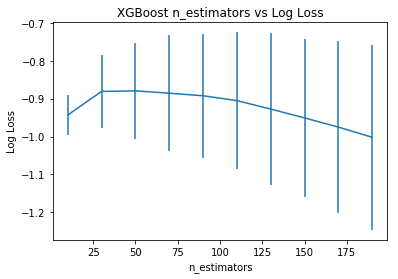

In [159]:
# XGBoost Tune n_estimators
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
# grid search
model = XGBClassifier()
n_estimators = range(10, 200, 20)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(n_estimators, means, yerr=stds)
pyplot.title("XGBoost n_estimators vs Log Loss")
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators.png')

range(3, 10)
Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   16.9s finished


Best: -0.901161 using {'max_depth': 3}
-0.901161 (0.173170) with: {'max_depth': 3}
-0.987416 (0.209498) with: {'max_depth': 4}
-1.069960 (0.243662) with: {'max_depth': 5}
-1.142513 (0.291755) with: {'max_depth': 6}
-1.193262 (0.281459) with: {'max_depth': 7}
-1.202725 (0.279971) with: {'max_depth': 8}
-1.201104 (0.280851) with: {'max_depth': 9}


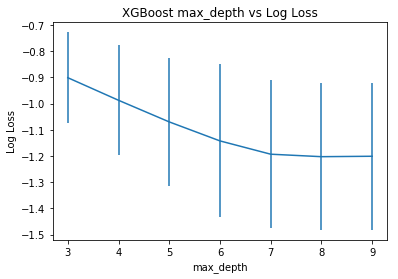

In [160]:
# XGBoost Tune max_depth
max_depth = range(3, 10, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_traincla, y_traincla)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
pyplot.errorbar(max_depth, means, yerr=stds)
pyplot.title("XGBoost max_depth vs Log Loss")
pyplot.xlabel('max_depth')
pyplot.ylabel('Log Loss')
pyplot.savefig('max_depth.png')

In [203]:
# apply models with best n_estimator = 30 and max_depth = 1
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=3,
 min_child_weight=5,
 gamma=0.2,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=8,
 scale_pos_weight=8,
 seed=27)
xgb1.fit(X_traincla, y_traincla)
y_pred_test = xgb1.predict(X_testcla)
# calculate accuracy
print('Accuracy of XGboost on train set: {:.2f}'.format(xgb1.score(X_traincla, y_traincla)))
print('Accuracy of XGboost on test set: {:.2f}'.format(xgb1.score(X_testcla, y_testcla)))

Accuracy of XGboost on train set: 1.00
Accuracy of XGboost on test set: 0.63


# Try other models

In [167]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_traincla, y_traincla)
y_pred_test = logreg.predict(X_testcla)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_traincla, y_traincla)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_testcla, y_testcla)))
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_testcla, y_pred_test)
print(confusion_matrix)

Accuracy of logistic regression classifier on train set: 0.61
Accuracy of logistic regression classifier on test set: 0.58
[[ 0 10  0]
 [ 0 31 10]
 [ 0  8  8]]


In [168]:
# SVM
from sklearn import svm
clf = svm.SVC()
clf.fit(X_traincla, y_traincla)  
y_pred_test = clf.predict(Xb_testcla)
print('Accuracy of SVM on train set: {:.2f}'.format(clf.score(X_traincla, y_traincla)))
print('Accuracy of SVM on test set: {:.2f}'.format(clf.score(X_testcla, y_testcla)))

Accuracy of SVM on train set: 1.00
Accuracy of SVM on test set: 0.61


In [175]:
# random forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 50)
random_forest.fit(X_traincla, y_traincla)
print('Accuracy of Random Forest on train set: {:.2f}'.format(random_forest.score(X_traincla, y_traincla)))
print('Accuracy of Random Forest on test set: {:.2f}'.format(random_forest.score(X_testcla, y_testcla)))

Accuracy of Random Forest on train set: 1.00
Accuracy of Random Forest on test set: 0.66


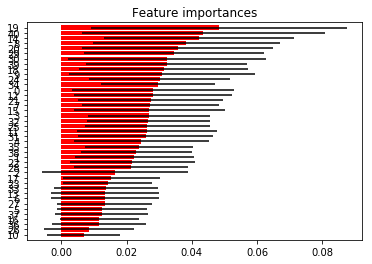

In [176]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.barh(range(X_traincla.shape[1]), importances[indices],
       color="r", xerr=std[indices], align="center")
# If you want to define your own labels,
# change indices to a list of labels on the following line.
plt.yticks(range(X_traincla.shape[1]), indices)
plt.ylim([-1, X_traincla.shape[1]])
plt.show()